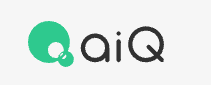

[disclaimer](./disclaimer.txt/)

# How to load FACTSET company fundamental data
- look up the unique FACTSET company IDs (=FSYM_ID) from tickers
- load fundamental data for the companies specified by FSYM_ID

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database / API for Equity Data  

In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
handler = DAL('FACTSET')

### Step 1: look up FACTSET unique company ID (FSYM_ID) from a ticker.
> This can be done with company names and figis as well. Please refer to the sample notebook for Lookup Symbol functionality.

#### **load**
> Load the data to memory  
> Set data_type = 'symbol_lookup' for looking up instrument IDs.  
> Showing 2 examples below.

In [7]:
# `data_type` must be 'symbol_lookup'
handler = handler.load(
    data_type='symbol_lookup',
    ticker='AMZN-US',
    currency_code='USD',
    exchange_code='NAS',
    pick_only_primary=True
)
handler.retrieve(transformed=False)

,FSYM_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,MCNYYL-R,AMZN-US,"Amazon.com, Inc.",NAS,USD,BBG000BVPV84,AMZN US


In [8]:
handler = handler.load(
    data_type='symbol_lookup',
    ticker='8035-JP',
    currency_code='JPY',
    exchange_code='TKS',
    pick_only_primary=True
)
handler.retrieve(transformed=False)

,FSYM_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,BS0GWP-R,8035-JP,Tokyo Electron Ltd.,TKS,JPY,BBG000BB59S7,8035 JP


### Step 2: Use the FSYM_ID above to load fundamental data by `data_type` = 'fundamental'
> these are initial publications

In [12]:
handler = handler.load(
    data_type='fundamental',
    symbols=['MCNYYL-R', 'BS0GWP-R'],
    freq=3,
    start_datetime='2020-01-01'
)
df_fundamental = handler.retrieve(transformed=False)
df_fundamental.head()

,FSYM_ID,DATE,ADJDATE,CURRENCY,FF_FPNC,FF_UPD_TYPE,FF_SALES,FF_INT_INC,FF_NON_INT_INC,FF_GROSS_INC,...,FF_INVEST_ACTIV_OTH,FF_DEP_CHG_CF,FF_DPS_ALL,FF_BK_COM_EQ_TIER1_TOT,FF_MISC_NET_OTH,FF_CAP_LEASE_CURR,FF_CURR_INS_BEN,FF_DFD_TAX_CF,FF_NET_INC_AFT_PFD,FF_OPER_LEASE_REPAY
0,MCNYYL-R,2023-06-30,2022-06-06,USD,202306,3,134383.0,NaN,NaN,65010.0,...,0.0,0.0,0.000000,NaN,0.0,3024.0,NaN,-2744.0,6750.0,NaN
1,BS0GWP-R,2023-03-31,2023-03-30,JPY,202303,3,558296.0,NaN,NaN,251689.0,...,NaN,0.0,284.666667,NaN,0.0,NaN,NaN,NaN,118664.0,NaN
2,MCNYYL-R,2022-09-30,2022-06-06,USD,202209,3,127101.0,NaN,NaN,56833.0,...,0.0,0.0,0.000000,NaN,0.0,5036.0,NaN,-825.0,2872.0,NaN
3,BS0GWP-R,2021-03-31,2023-03-30,JPY,202103,3,439217.0,NaN,NaN,178209.0,...,-2281.0,0.0,140.333190,NaN,0.0,NaN,NaN,0.0,84762.0,NaN
4,MCNYYL-R,2020-12-31,2022-06-06,USD,202012,3,125555.0,NaN,NaN,46271.0,...,0.0,0.0,0.000000,NaN,0.0,10374.0,NaN,-1636.0,7222.0,NaN


#### You can pull annual reports by specifying `freq`=12

In [14]:
handler = handler.load(
    data_type='fundamental',
    symbols=['MCNYYL-R', 'BS0GWP-R'],
    freq=12,
    start_datetime='2020-01-01'
)
df_annual = handler.retrieve(transformed=False)
df_annual.head()

,FSYM_ID,DATE,ADJDATE,CURRENCY,FF_FPNC,FF_UPD_TYPE,FF_SALES,FF_INT_INC,FF_NON_INT_INC,FF_GROSS_INC,...,FF_DEP_CHG_CF,FF_ASSETS_NONPERF,FF_DPS_ALL,FF_BK_COM_EQ_TIER1_TOT,FF_MISC_NET_OTH,FF_CAP_LEASE_CURR,FF_CURR_INS_BEN,FF_INTANG_DEVT,FF_NET_INC_AFT_PFD,FF_OPER_LEASE_REPAY
0,BS0GWP-R,2020-03-31,2023-03-30,JPY,202003,3,1127286.0,NaN,NaN,451942.0,...,0.0,NaN,195.999810,NaN,0.0,NaN,NaN,NaN,185206.0,NaN
1,MCNYYL-R,2023-12-31,2022-06-06,USD,202312,3,574785.0,NaN,NaN,270046.0,...,0.0,NaN,0.000000,NaN,0.0,2032.0,NaN,NaN,30425.0,NaN
2,MCNYYL-R,2021-12-31,2022-06-06,USD,202112,3,469822.0,NaN,NaN,197478.0,...,0.0,NaN,0.000000,NaN,0.0,8083.0,NaN,NaN,33364.0,NaN
3,BS0GWP-R,2022-03-31,2023-03-30,JPY,202203,3,2003805.0,NaN,NaN,911822.0,...,0.0,NaN,467.666200,NaN,0.0,NaN,NaN,NaN,437076.0,NaN
4,BS0GWP-R,2023-03-31,2023-03-30,JPY,202303,3,2209025.0,NaN,NaN,984408.0,...,0.0,NaN,570.333048,NaN,0.0,NaN,NaN,NaN,471584.0,NaN


#### `restatement`=True if you wish to obtain restated figures.

In [17]:
handler = handler.load(
    data_type='fundamental',
    symbols=['MCNYYL-R', 'BS0GWP-R'],
    freq=3,
    restatement=True
)
df_restatements = handler.retrieve(transformed=False)
df_restatements.head()

,FSYM_ID,DATE,ADJDATE,CURRENCY,FF_FPNC,FF_UPD_TYPE,FF_SALES,FF_INT_INC,FF_NON_INT_INC,FF_GROSS_INC,...,FF_MISC_NET_OTH,FF_CAP_LEASE_CURR,FF_CURR_INS_BEN,FF_DFD_TAX_CF,FF_DPS_EXDATE,FF_NET_INC_AFT_PFD,FF_OPER_LEASE_REPAY,FF_SOURCE_BS_DATE,FF_SOURCE_CF_DATE,FF_SOURCE_IS_DATE
0,MCNYYL-R,2017-06-30,2022-06-06,USD,201706,3,37955.0,NaN,NaN,14504.0,...,0.0,5073.0,NaN,376.0,None,197.0,NaN,2017-07-28,2018-07-27,2018-07-27
